## Index Construction
This section develops a framework to evaluate how efficiently countries convert public health expenditure into improved health outcomes. The goal is to compare countries based on their health system performance relative to spending, while accounting for demographic and economic context. Inputs:

Health expenditure (per capita or % of GDP)

Outputs (Health Outcomes):

Life expectancy at birth

Infant mortality rate

Under-5 mortality rate

(Optional: Maternal mortality, DALYs, HALE)

Contextual Variables:

GDP per capita (economic capacity)

Dependency ratio (aging burden)

Population size or density (scalability)

Urbanization rate (access to care)

Efficiency Score:
We compute a composite health outcome score using normalized health indicators, then divide it by health spending to obtain an efficiency ratio. This can be adjusted for contextual variables using regression, DEA, or custom weighting.

Interpretation: A higher score reflects greater efficiency—achieving better health outcomes with less spending, adjusted for demographic and income differences.

try to replicate the model following ECB paper: https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp242.pdf

## Public Sector Performance (PSP) Measurement: PSP Index → This index aggregates seven sub-indicators that reflect the outcomes of public sector activity: In the original paper, the PSP index is constructed from 7 sub-indicators (education, health, etc.), each normalized on a 0–1 scale across countries

Education
Health
Public infrastructure
Economic stability
Economic performance
Income distribution
Administrative performance



## Public Sector Efficiency (PSE) Measurement: PSE Index → This index relates the PSP score to government input, usually government expenditure (either total or specific functional spending). PSE = PSP/Government Spending

In [8]:
import pandas as pd
import numpy as np

# Load merged dataset
df = pd.read_csv("../data/processed/merged_all_data.csv")

# Drop rows with missing key data
df = df.dropna(subset=["Education_perGDP", "Health_Expenditure", "GDP_percapita", "Dependency_Ratio"])

# Normalize selected indicators using min-max scaling
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df["edu_index"] = normalize(df["Education_perGDP"])
df["health_index"] = normalize(df["Health_Expenditure"])
df["gdp_index"] = normalize(df["GDP_percapita"])
df["demo_index"] = 1 - normalize(df["Dependency_Ratio"])  # inverse: higher burden = lower performance

# Construct PSP as average of the normalized indices
df["PSP"] = df[["edu_index", "health_index", "gdp_index", "demo_index"]].mean(axis=1)

# Compute total government spending (as % of GDP)
df["gov_spending"] = df["Education_perGDP"] + df["Health_Expenditure"]

# Construct PSE = PSP / Government Spending
df["PSE"] = df["PSP"] / df["gov_spending"]

# Save result
df.to_csv("../data/processed/psp_pse_results.csv", index=False)

# Display sample
df[["Country", "Year", "PSP", "PSE"]].head()


,Country,Year,PSP,PSE
2,Andorra,2002,0.403857,0.052751
4,Andorra,2004,0.437972,0.064100
5,Andorra,2005,0.455188,0.062873
6,Andorra,2006,0.475687,0.065974
7,Andorra,2007,0.487495,0.069363


## integrate R&D and contribution revenue into a broader index

In [16]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("../data/processed/merged_all_data.csv")

# Drop rows with missing values in any key indicator
df = df.dropna(subset=[
    "Education_perGDP", "Health_Expenditure", "GDP_percapita", "Dependency_Ratio",
    "RD_Expenditure", "Contribution_revenue"
])

# Normalize all performance indicators (higher is better)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df["edu_index"] = normalize(df["Education_perGDP"])
df["health_index"] = normalize(df["Health_Expenditure"])
df["gdp_index"] = normalize(df["GDP_percapita"])
df["demo_index"] = 1 - normalize(df["Dependency_Ratio"])  # reverse scale
df["rd_index"] = normalize(df["RD_Expenditure"])
df["contrib_index"] = normalize(df["Contribution_revenue"])

# New PSP: average of all six indicators
df["PSP"] = df[[
    "edu_index", "health_index", "gdp_index",
    "demo_index", "rd_index", "contrib_index"
]].mean(axis=1)

# Government spending: education + health
df["gov_spending"] = df["Education_perGDP"] + df["Health_Expenditure"]

# PSE: efficiency = PSP / spending
df["PSE"] = df["PSP"] / df["gov_spending"]

# Save results
df.to_csv("../data/processed/psp_pse_results_extended.csv", index=False)

# Show results
df[["Country", "Year", "PSP", "PSE"]].head()


,Country,Year,PSP,PSE
21,Argentina,2000,0.336549,0.026292
22,Argentina,2001,0.344162,0.026062
23,Argentina,2002,0.287644,0.025208
24,Argentina,2003,0.261170,0.025041
25,Argentina,2004,0.268319,0.025041


In [18]:
import pandas as pd
import numpy as np

# Load merged dataset
df = pd.read_csv("../data/processed/merged_all_data.csv")

# Drop rows with missing values in any relevant indicators
df = df.dropna(subset=[
    "Education_perGDP", "Health_Expenditure", "GDP_percapita", "Dependency_Ratio",
    "RD_Expenditure", "Contribution_revenue"
])

# Normalize all indicators (min-max)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Basic 4-index inputs
df["edu_index"] = normalize(df["Education_perGDP"])
df["health_index"] = normalize(df["Health_Expenditure"])
df["gdp_index"] = normalize(df["GDP_percapita"])
df["demo_index"] = 1 - normalize(df["Dependency_Ratio"])  # inverse

# Additional 2 indicators
df["rd_index"] = normalize(df["RD_Expenditure"])
df["contrib_index"] = normalize(df["Contribution_revenue"])

# Construct PSP_4 and PSP_6
df["PSP_4"] = df[["edu_index", "health_index", "gdp_index", "demo_index"]].mean(axis=1)
df["PSP_6"] = df[["edu_index", "health_index", "gdp_index", "demo_index", "rd_index", "contrib_index"]].mean(axis=1)

# Government spending (inputs for PSE): education + health
df["gov_spending"] = df["Education_perGDP"] + df["Health_Expenditure"]

# Construct PSE_4 and PSE_6
df["PSE_4"] = df["PSP_4"] / df["gov_spending"]
df["PSE_6"] = df["PSP_6"] / df["gov_spending"]

# Save results
df.to_csv("../data/processed/psp_pse_results_4_and_6.csv", index=False)

# Display results
df[["Country", "Year", "PSP_4", "PSE_4", "PSP_6", "PSE_6"]].head()


,Country,Year,PSP_4,PSE_4,PSP_6,PSE_6
21,Argentina,2000,0.376356,0.029402,0.336549,0.026292
22,Argentina,2001,0.391219,0.029625,0.344162,0.026062
23,Argentina,2002,0.322529,0.028266,0.287644,0.025208
24,Argentina,2003,0.296572,0.028436,0.261170,0.025041
25,Argentina,2004,0.306263,0.028582,0.268319,0.025041


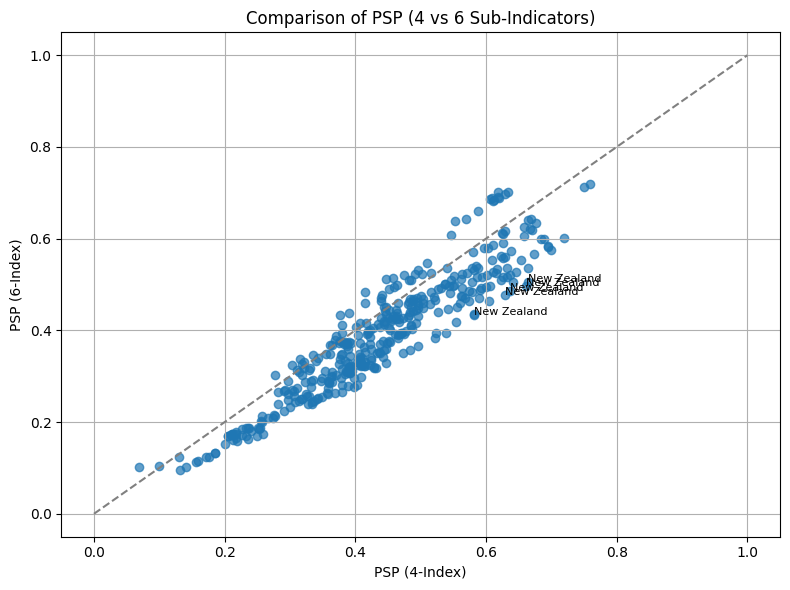

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset with PSP_4 and PSP_6
df = pd.read_csv("../data/processed/psp_pse_results_4_and_6.csv")

# Drop rows with missing PSP scores
df_plot = df.dropna(subset=["PSP_4", "PSP_6", "Country"])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_plot["PSP_4"], df_plot["PSP_6"], alpha=0.7)

# Identity line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and title
plt.xlabel("PSP (4-Index)")
plt.ylabel("PSP (6-Index)")
plt.title("Comparison of PSP (4 vs 6 Sub-Indicators)")

# Annotate countries with largest shifts
df_plot["diff"] = (df_plot["PSP_6"] - df_plot["PSP_4"]).abs()
top_diff = df_plot.sort_values(by="diff", ascending=False).head(5)

for _, row in top_diff.iterrows():
    plt.annotate(row["Country"], (row["PSP_4"], row["PSP_6"]), fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()


These countries improve their PSP score when innovation and fiscal capacity are included.

Interpretation: They perform strongly in R&D and/or contribution revenue, which enhances their overall public sector quality under a broader metric.

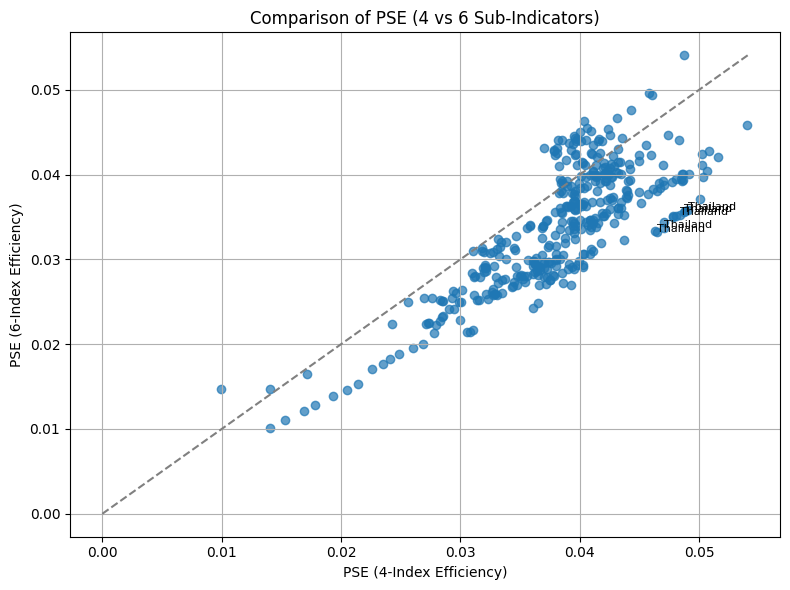

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset with PSE_4 and PSE_6
df = pd.read_csv("../data/processed/psp_pse_results_4_and_6.csv")

# Drop rows with missing PSE scores
df_plot = df.dropna(subset=["PSE_4", "PSE_6", "Country"])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_plot["PSE_4"], df_plot["PSE_6"], alpha=0.7)

# Identity line
plt.plot([0, df_plot[["PSE_4", "PSE_6"]].max().max()], 
         [0, df_plot[["PSE_4", "PSE_6"]].max().max()], linestyle='--', color='gray')

# Labels and title
plt.xlabel("PSE (4-Index Efficiency)")
plt.ylabel("PSE (6-Index Efficiency)")
plt.title("Comparison of PSE (4 vs 6 Sub-Indicators)")

# Annotate countries with largest shifts
df_plot["diff"] = (df_plot["PSE_6"] - df_plot["PSE_4"]).abs()
top_diff = df_plot.sort_values(by="diff", ascending=False).head(5)

for _, row in top_diff.iterrows():
    plt.annotate(row["Country"], (row["PSE_4"], row["PSE_6"]), fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()


Points above the diagonal: countries appear more efficient when R&D and fiscal strength are considered.

Points below the line: countries seem less efficient under broader expectations.

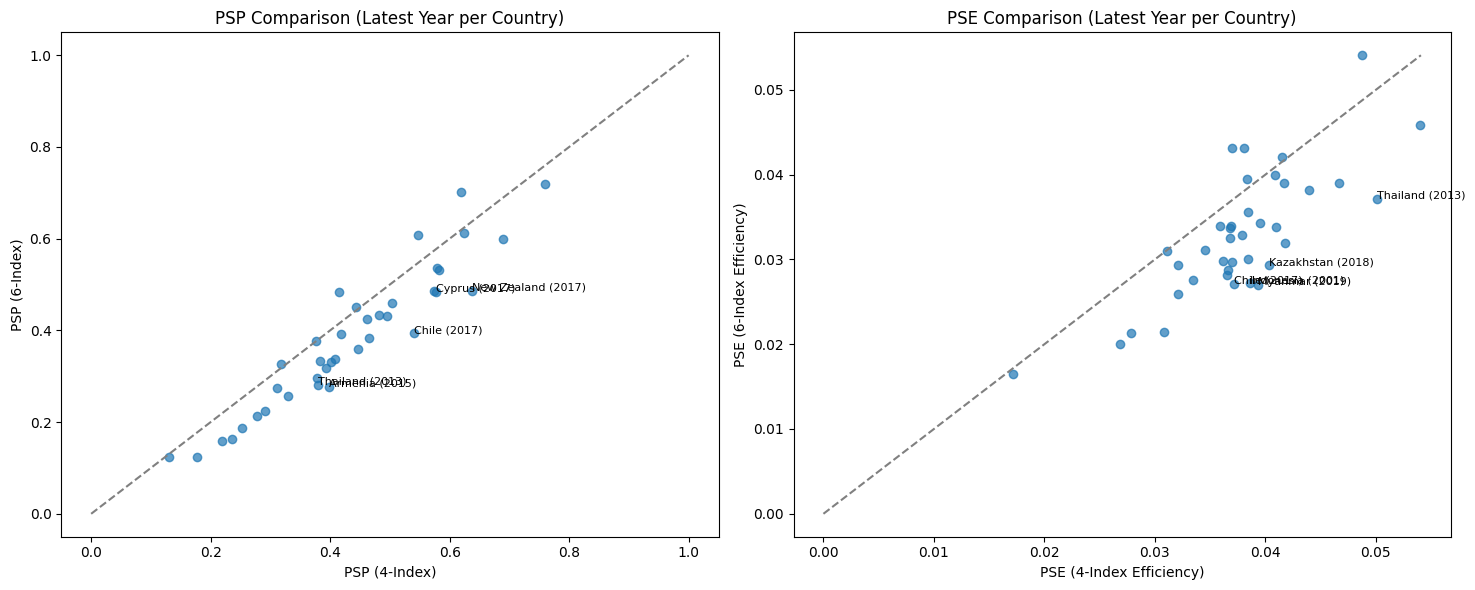

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/processed/psp_pse_results_4_and_6.csv")

# Drop missing values
df = df.dropna(subset=["PSP_4", "PSP_6", "PSE_4", "PSE_6", "Year", "Country"])

# Filter to latest year per country
df_latest = df.sort_values("Year").groupby("Country").tail(1)

# Calculate absolute differences for annotations
df_latest["psp_diff"] = (df_latest["PSP_6"] - df_latest["PSP_4"]).abs()
df_latest["pse_diff"] = (df_latest["PSE_6"] - df_latest["PSE_4"]).abs()

# Set up figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Chart 1: PSP Comparison ---
axes[0].scatter(df_latest["PSP_4"], df_latest["PSP_6"], alpha=0.7)
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel("PSP (4-Index)")
axes[0].set_ylabel("PSP (6-Index)")
axes[0].set_title("PSP Comparison (Latest Year per Country)")
for _, row in df_latest.sort_values(by="psp_diff", ascending=False).head(5).iterrows():
    axes[0].annotate(f"{row['Country']} ({int(row['Year'])})", 
                     (row["PSP_4"], row["PSP_6"]), fontsize=8)

# --- Chart 2: PSE Comparison ---
max_pse = df_latest[["PSE_4", "PSE_6"]].max().max()
axes[1].scatter(df_latest["PSE_4"], df_latest["PSE_6"], alpha=0.7)
axes[1].plot([0, max_pse], [0, max_pse], linestyle='--', color='gray')
axes[1].set_xlabel("PSE (4-Index Efficiency)")
axes[1].set_ylabel("PSE (6-Index Efficiency)")
axes[1].set_title("PSE Comparison (Latest Year per Country)")
for _, row in df_latest.sort_values(by="pse_diff", ascending=False).head(5).iterrows():
    axes[1].annotate(f"{row['Country']} ({int(row['Year'])})", 
                     (row["PSE_4"], row["PSE_6"]), fontsize=8)

# Final layout
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("../data/processed/psp_pse_results_4_and_6.csv")

# Drop missing values
df = df.dropna(subset=["PSP_6", "PSE_6", "Year", "Country"])

# Calculate latest PSE_6 per country
latest_pse = (
    df.sort_values("Year")
      .groupby("Country")
      .tail(1)[["Country", "PSE_6"]]
      .rename(columns={"PSE_6": "PSE_6_latest"})
)

# Merge back to main dataframe
df = df.merge(latest_pse, on="Country", how="left")

# Create animated scatter plot
fig = px.scatter(
    df,
    x="PSP_6",
    y="PSE_6",
    animation_frame="Year",
    animation_group="Country",
    color="PSE_6_latest",
    color_continuous_scale="RdYlGn",  # Red (low) to Green (high)
    text="Country",
    hover_name="Country",
    size_max=40,
    range_x=[0, 1],
    range_y=[0, df["PSE_6"].max() * 1.1],
    title="Public Sector Performance vs Efficiency (6 Indicators) Over Time"
)

fig.update_traces(marker=dict(size=8), textposition='top center')
fig.update_layout(
    height=600,
    coloraxis_colorbar=dict(title="Efficiency (Latest PSE_6)", tickformat=".3f")
)
fig.show()


### 📝 Note: Health Expenditure Efficiency Index (HEEI)

This index evaluates how efficiently countries convert public health spending into better health outcomes. The model uses normalized indicators such as life expectancy and mortality rates to compute a composite outcome score. The efficiency index is calculated as:

**HEEI = Health Outcome Score / Health Expenditure per Capita**

An adjusted version accounts for GDP per capita and the age dependency ratio to reflect contextual factors affecting health system performance.


In [ ]:
# Health Expenditure Efficiency Index (HEEI) - Synthetic Example

import pandas as pd
import numpy as np

# Sample synthetic dataset for demonstration
# Replace with actual data in future analysis
data = {
    'Country': ['A', 'B', 'C', 'D', 'E'],
    'Health_Expenditure_Per_Capita': [500, 1500, 800, 200, 1200],
    'Life_Expectancy': [70, 82, 75, 65, 78],
    'Infant_Mortality_Rate': [30, 4, 10, 50, 6],
    'Under5_Mortality_Rate': [40, 5, 12, 70, 8],
    'GDP_per_Capita': [2000, 40000, 10000, 1500, 25000],
    'Dependency_Ratio': [60, 50, 55, 65, 52]
}

df = pd.DataFrame(data)

# --- Normalize health outcome variables ---
# Higher is better
df['Norm_Life_Expectancy'] = (
    df['Life_Expectancy'] - df['Life_Expectancy'].min()
) / (df['Life_Expectancy'].max() - df['Life_Expectancy'].min())

# Lower is better — so we invert the scale
df['Norm_Infant_Mortality'] = 1 - (
    df['Infant_Mortality_Rate'] - df['Infant_Mortality_Rate'].min()
) / (df['Infant_Mortality_Rate'].max() - df['Infant_Mortality_Rate'].min())

df['Norm_U5_Mortality'] = 1 - (
    df['Under5_Mortality_Rate'] - df['Under5_Mortality_Rate'].min()
) / (df['Under5_Mortality_Rate'].max() - df['Under5_Mortality_Rate'].min())

# Composite health outcome score (equal weights)
df['Health_Outcome_Score'] = df[
    ['Norm_Life_Expectancy', 'Norm_Infant_Mortality', 'Norm_U5_Mortality']
].mean(axis=1)

# Efficiency: outcome per dollar spent
df['Health_Efficiency_Index'] = (
    df['Health_Outcome_Score'] / df['Health_Expenditure_Per_Capita']
)

# Optional: Adjusted index to account for GDP and demographic pressure
df['Adjusted_Health_Efficiency_Index'] = (
    df['Health_Efficiency_Index']
    * (df['GDP_per_Capita'] / 10000)  # normalize GDP
    * (100 / df['Dependency_Ratio'])  # inverse of burden
)

# Display the resulting index
df_sorted = df[['Country', 'Health_Efficiency_Index', 'Adjusted_Health_Efficiency_Index']]
print("Health Expenditure Efficiency Index (HEEI):")
display(df_sorted.round(6))
